In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# ================= CARGA DE DATOS =================
acc_ult = pd.read_csv("Accesos_Ultimo_Trim.csv", sep=";", decimal=",")
conx_per = pd.read_csv("Conexiones_Periodos.csv", sep=";", decimal=",")
conx_prov = pd.read_csv("Conexiones_Provincias.csv", sep=";", decimal=",")
localidades = pd.read_csv("Localidades.csv", sep=";", decimal=",")
periodos = pd.read_csv("Periodos.csv", sep=";", decimal=",")
provincias = pd.read_csv("Provincias.csv", sep=";", decimal=",")
rangos = pd.read_csv("Rangos.csv", sep=";", decimal=",")
tecnologias = pd.read_csv("Tecnologias.csv", sep=";", decimal=",")
vel_loc = pd.read_csv("Velocidades_Loc.csv", sep=";", decimal=",")
vel_prov = pd.read_csv("Velocidades_Prov.csv", sep=";", decimal=",")


Gráfico 1 – Accesos por tecnología (último trimestre, país)

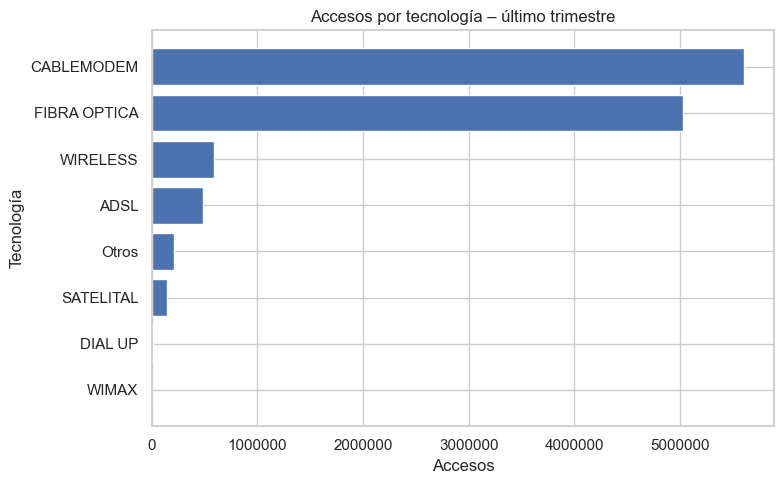

In [5]:
# Merge para traer el nombre de la tecnología
acc_tec = (
    acc_ult.merge(tecnologias, on="ID_Tecnologia")
           .groupby("ID_Tecnologia", as_index=False)["Accesos"]
           .sum()
           .sort_values("Accesos", ascending=True)   #  ORDENAR DESCENDENTE
)

plt.figure(figsize=(8,5))
plt.barh(acc_tec["ID_Tecnologia"], acc_tec["Accesos"])
plt.ticklabel_format(style='plain', axis='x')
plt.title("Accesos por tecnología – último trimestre")
plt.xlabel("Accesos")
plt.ylabel("Tecnología")
plt.tight_layout()
plt.show()


Gráfico 2 – Top 10 provincias por accesos totales (último período)

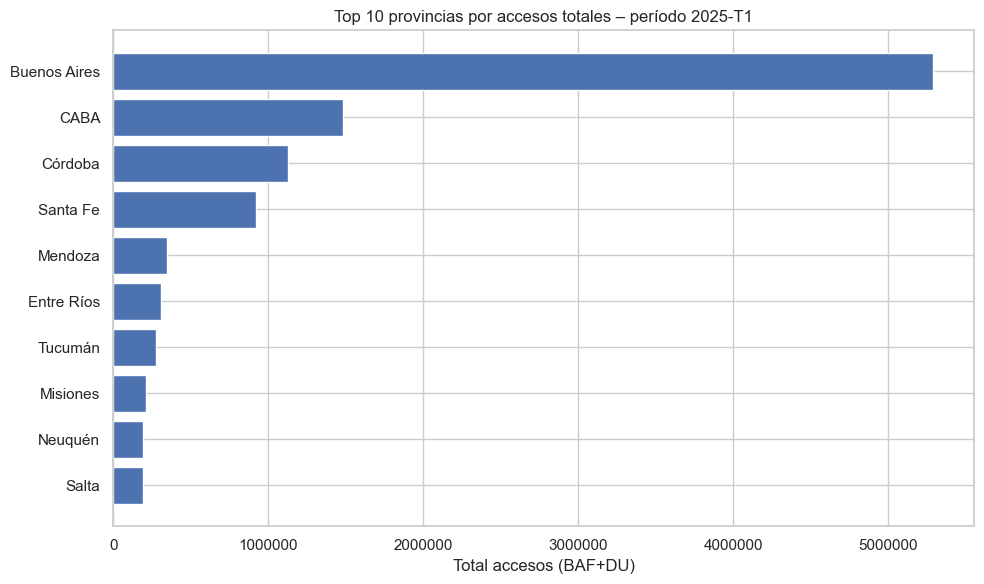

In [7]:
# Determinar último periodo por Año y Trimestre
per_orden = periodos.sort_values(["Año", "Trimestre"])
ultimo_id_periodo = per_orden["ID_Periodo"].iloc[-1]

top_prov = (
    conx_prov[conx_prov["ID_Periodo"] == ultimo_id_periodo]
    .groupby("ID_Provincia", as_index=False)["Total(BAF+DU)"]
    .sum()
    .sort_values("Total(BAF+DU)", ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))
plt.barh(top_prov["ID_Provincia"], top_prov["Total(BAF+DU)"])
plt.gca().invert_yaxis()
plt.ticklabel_format(style='plain', axis='x')
plt.title(f"Top 10 provincias por accesos totales – período {ultimo_id_periodo}")
plt.xlabel("Total accesos (BAF+DU)")
plt.tight_layout()
plt.show()


Gráfico 3 – Distribución de accesos por rango de velocidad (último período, provincias)

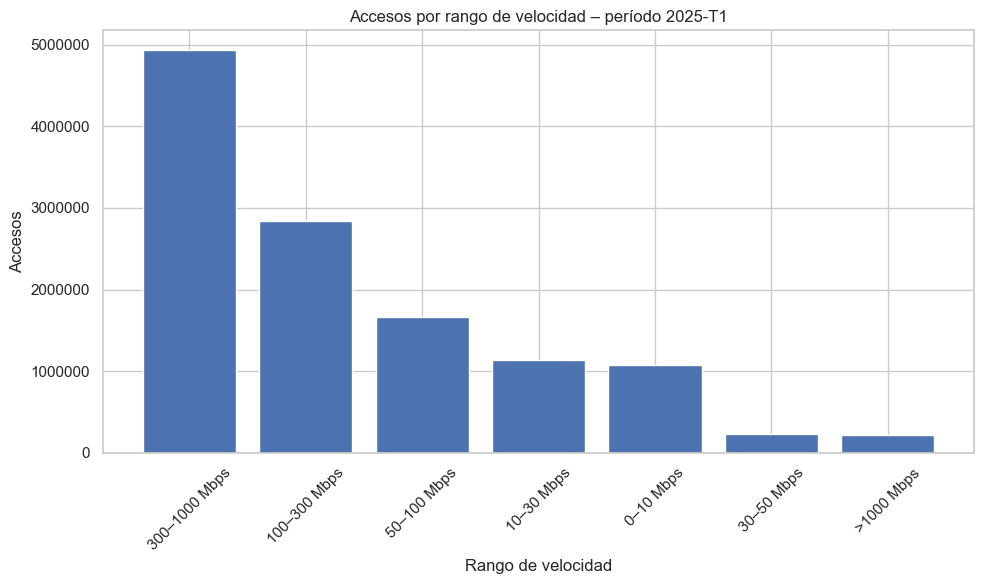

In [9]:
# Usamos ID_Rango_Velocidad + Rangos para etiqueta
vel_prov_ult = vel_prov[vel_prov["ID_Periodo"] == ultimo_id_periodo]

acc_rango = (
    vel_prov_ult.merge(rangos, on="ID_Rango_Velocidad")
                .groupby("ID_Rango_Velocidad", as_index=False)["Accesos"]
                .sum()
                .sort_values("Accesos", ascending=False)
)

plt.figure(figsize=(10,6))
plt.bar(acc_rango["ID_Rango_Velocidad"], acc_rango["Accesos"])
plt.ticklabel_format(style='plain', axis='y')
plt.title(f"Accesos por rango de velocidad – período {ultimo_id_periodo}")
plt.xlabel("Rango de velocidad")
plt.ylabel("Accesos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
